In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
#Required text pre-processing libraries are imported
import string
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import tokenize from nltk library
from nltk import tokenize
# import WordNetLemmatizer from nltk library
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist

#Required data visualisation libraries are imported
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt


#Required prediction modelling libraries are imported
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, precision_score, precision_recall_fscore_support, roc_auc_score, make_scorer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import xgboost
from xgboost import XGBClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jillian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#reading in final dataset

In [4]:
df = pd.read_csv('./data/singe_word_data.csv')

In [5]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive Feedback Count,Division Name,Department Name,Class_Name,Clean,String,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"['sooo', 'pretty', 'happened', 'find', 'store'...",sooo pretty happened find store glad bc never ...,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['high', 'hope', 'wanted', 'work', 'initially'...",high hope wanted work initially petite usual f...,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['jumpsuit', 'fun', 'flirty', 'fabulous', 'eve...",jumpsuit fun flirty fabulous every time get no...,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['shirt', 'flattering', 'due', 'adjustable', '...",shirt flattering due adjustable front tie perf...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22640 entries, 0 to 22639
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review_Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended_IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class_Name               22627 non-null  object
 10  Clean                    22640 non-null  object
 11  String                   22636 non-null  object
 12  Positive_Rating          22640 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.2+ MB


In [7]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class_Name                   13
Clean                         0
String                        4
Positive_Rating               0
dtype: int64

In [8]:
df[df.String.isna() == True]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive Feedback Count,Division Name,Department Name,Class_Name,Clean,String,Positive_Rating
4123,857,55,NaN,Love this top!,5,1,1,General,Tops,Knits,[],NaN,1
10869,1094,54,NaN,Love this dress !!,5,1,0,General Petite,Dresses,Dresses,[],NaN,1
13324,1078,37,Love,Love this dress and the color,5,1,1,General,Dresses,Dresses,[],NaN,1
15779,1087,27,NaN,I love this dress!,5,1,3,General,Dresses,Dresses,[],NaN,1


In [9]:
#due to adding words to our stop list, we now have 4 "Clean" reviews with no words; 
#we will eliminate these rows for modeling

In [10]:
df = df[df.String.isna() == False]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22636 entries, 0 to 22639
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              22636 non-null  int64 
 1   Age                      22636 non-null  int64 
 2   Title                    19674 non-null  object
 3   Review_Text              22636 non-null  object
 4   Rating                   22636 non-null  int64 
 5   Recommended_IND          22636 non-null  int64 
 6   Positive Feedback Count  22636 non-null  int64 
 7   Division Name            22623 non-null  object
 8   Department Name          22623 non-null  object
 9   Class_Name               22623 non-null  object
 10  Clean                    22636 non-null  object
 11  String                   22636 non-null  object
 12  Positive_Rating          22636 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


# Modeling

In [12]:
#will be using accuracy as metric; want to identify neutral/negative sentiments and be able
#to sample enough of them to get a clear view of if there is a consistent issue
#that we as a company can change for our soft roll out
#also want to be able to ball park which items will be most popular, so we can have
#an appropriate amount of inventory

For each model we created a pipeline that includes a TF-IDF vectorizer, a smote component to deal with class imbalance, and the classifier itself. We elected to use a TF-IDF vectorizer instead of a count vectorizer because it provides a way to understand the importance of each word to the tweet, as well as just how frequently it occurs.

To give the model a little bit more information with those same features, we'll use a TfidfVectorizer (documentation here) so that it counts not only the term frequency (tf) within a single document, it also includes the inverse document frequency (idf) — how rare the term is.



### Train-Test Split

In [13]:
# Specify X as the cleaned strings in df and y as the target-Positive_Rating.
X = df['String']
y = df['Positive_Rating']

In [14]:
#Performed the train-test split, using 20% for the hold-out data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.20)

In [15]:
X_train

19638    always lookout piece polished arent fussy blaz...
12706    short linen touch stretch great keeping shape ...
9196     wanted sweater lavender design pleated back be...
4689               glad tried see lovely definitely keeper
21455    got fooled description polyester wool claim ch...
                               ...                        
11966    great work enjoying brunch dinner friend comfo...
21579    cozy wrap material soft find grabbing anytime ...
5391     duster nice light weight dark navy throw add l...
860      excited see jean since came petite short insea...
15799    sweater pretty soft real life purchase coral r...
Name: String, Length: 18108, dtype: object

In [16]:
# Instantiate a vectorizer 
# Instantiate and fit/transform X_train using the TF-IDF vectorizer.
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train)
X_train_vectorized

<18108x15448 sparse matrix of type '<class 'numpy.float64'>'
	with 409986 stored elements in Compressed Sparse Row format>

In [17]:
# Convert vectorized X_train to a vector for easier visual inspection.
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
X_train_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00p,00p0p,00p0rxxsxs,02xs,03dd,0dd,0in,0p,0pand,0petite,...,zippered,zipperi,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Transform test data using TF-IDF Vectorizer trained on X_train, y_train
X_test_vectorized = tfidf.transform(X_test)
X_test_vectorized

<4528x15448 sparse matrix of type '<class 'numpy.float64'>'
	with 98903 stored elements in Compressed Sparse Row format>

In [19]:
# Convert to DataFrame for visual inspection
X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())
X_test_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00p,00p0p,00p0rxxsxs,02xs,03dd,0dd,0in,0p,0pand,0petite,...,zippered,zipperi,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Function to return scores in cross validation

In [21]:
# Accuracy
accuracy = make_scorer(accuracy_score)

#f1
custom_f1 = make_scorer(
    f1_score, 
    average="weighted")

# Precision
multi_prec = make_scorer(
    precision_score,
    average="weighted")

# Recall
multi_rec = make_scorer(
    recall_score,
    average="weighted")

# This function will allow for quick cross-validation of the chosen score for each of our models.
def cross_val(model, X, y, custom_scorer, kfolds=5):
    """ Perform cross-validated scoring and store/print results """
    results = cross_val_score(model, X, y, cv=kfolds, scoring=custom_scorer)
    mean = np.mean(results)
    median = np.median(results)
    std = np.std(results)
    if custom_scorer == accuracy:
        print(f"Mean accuracy score: ", {mean}, ".")
        print(f"Median acuracy score: ", {median}, ".")
        print(f"Standard Deviation in accuracy: ", {std}, ".") 
    elif custom_scorer == custom_f1:
        print(f"Mean f1 score: ", {mean}, ".")
        print(f"Median f1 score: ", {median}, ".")
        print(f"Standard Deviation in f1 score: ", {std}, ".") 
    elif custom_scorer == multi_prec:
        print(f"Mean precision score: ", {mean}, ".")
        print(f"Median precision score: ", {median}, ".")
        print(f"Standard Deviation in precision score: ", {std}, ".") 
    elif custom_scorer == multi_rec:
        print(f"Mean recall score: ", {mean}, ".")
        print(f"Median recall score: ", {median}, ".")
        print(f"Standard Deviation in recall score: ", {std}, ".") 

## Dummy Classifier

0.7688866799204771


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


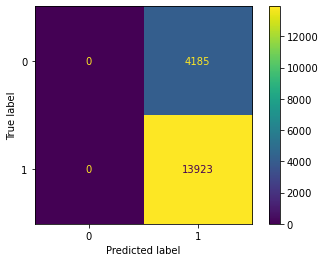

In [60]:
# Instantiate Dummy Classifier 
dummy_model = DummyClassifier()

#Fit and Evaluate Dummy Classifier
dummy_model.fit(X_train_vectorized, y_train)
dummy_yhat = dummy_model.predict(X_train)
plot_confusion_matrix(dummy_model, X_train, y_train);
print(accuracy_score(y_train, dummy_yhat))

We see our Dummy Model predicts our majority label, 1, for each observation. Due to class imbalance, the model performed well at 77% accuracy score.

## Multinomal Naive Bayes

Now that we have preprocessed data, we can fit and evaluate a multinomial Naive Bayes classifier using cross_val_score.

In [23]:
# Instantiate a MultinomialNB classifier
multinomial_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
multinomial_cv = cross_val_score(multinomial_model, X_train_vectorized, y_train)
multinomial_cv

array([0.786582  , 0.7807841 , 0.78244064, 0.78376139, 0.78210439])

In [24]:
y_train.value_counts(normalize=True)

1    0.768887
0    0.231113
Name: Positive_Rating, dtype: float64

If we guessed the plurality class every time (class 1), we would expect about 77% accuracy score (captured by our Dummy Model). So when this model is getting 78% accuracy, that is a very minimal improvement over just guessing. Let's see if we can improve that with more sophisticated modeling techinques. 

In [25]:
#With no max_features set, we see X_train_vec and X_test_vec contains 15448 columns(unique words); this many words will create
#a lot of "noise"; we want to set our max_features to only focus on the words that are appearing more often
#setting max_features to 500 improved Multinomial NB to over 80%

## Initial Model CV Results

In [26]:
benchmark = []
# Iterate over all algorithms
for algorithm in [MultinomialNB(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), XGBClassifier(), RandomForestClassifier()]:
    # Perform cross validation
    results = cross_val_score(algorithm, X_train_vectorized, y_train)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm')

,0
Algorithm,
MultinomialNB(),0.783135
LogisticRegression(),0.868898
KNeighborsClassifier(),0.810360
DecisionTreeClassifier(),0.782361
"XGBClassifier(base_score=None,",0.856472
RandomForestClassifier(),0.833388


In [27]:
#based on initial run through of algorithms, it looks like I should explore LogisticRegression, XGBoost, and RandomForestClassifier more

In [28]:
#also want to play with vectorizor params

## Grid Searching Logistic Regression 

In [29]:
lr_pipe = Pipeline([
           ('vect', TfidfVectorizer()),
           ('lr', LogisticRegression(random_state=42)),
])


In [30]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('lr', LogisticRegression(random_state=42))])

In [31]:
lr_pipe.score(X_train, y_train)

0.8993262646344157

In [32]:
#initial Logistic Regression score with default parameters

In [33]:
# Perform a cross validation to determine whether or not the model is overfit
avg_lr_cv = np.mean(cross_val_score(estimator=lr_pipe, X=X_train, y=y_train, cv=5))

In [34]:
avg_lr_cv

0.870057632093053

In [35]:
#setting up grid to perform grid serach to tune hyperparameters

In [36]:
lr_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000, 2000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [37]:
# set up GridSearchCV object
grid_lr = GridSearchCV(lr_pipe, param_grid=lr_params, cv=5, verbose=3)

In [38]:
# fit our grid object for Logistic Regression to the training data
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.868 total time=   0.5s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.866 total time=   0.6s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.872 total time=   0.7s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.874 total time=   0.7s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.870 total time=   0.6s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=500;, score=0.864 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs

[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=0.875 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=0.872 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=0.867 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.868 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.866 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.872 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.874 total ti

[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=1000;, score=0.865 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.868 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.870 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.874 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.873 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.867 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=0.868 total 

[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.867 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.867 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.870 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.870 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.865 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=0.868 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_feat

[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vec

[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__

[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=1000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__

[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=500;, score=0.835 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=500;, score=0.819 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.842 total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.849 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.848 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.845 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max

[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=None;, score=0.850 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.828 total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.834 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.837 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.835 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.819 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=

[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=0.848 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.858 total time=   0.4s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.853 total time=   0.4s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.858 total time=   0.4s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.859 total time=   0.4s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.850 total time=   0.4s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear,

[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__so

[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga,

[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__pen

[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__pe

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__max_features': (None, 500, 1000, 2000)},
             verbose=3)

In [39]:
best_parameters = grid_lr.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_lr.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)
training_recall = recall_score(y_train, training_preds, average = None)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'lbfgs'
vect__max_df: 0.5
vect__max_features: 2000
Training Accuracy: 89.38%
[0.65782557 0.96473461]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'lbfgs'
- vect__max_df: 0.5
- vect__max_features: 2000
- Training Accuracy: 89.38%
- [0.65782557 0.96473461]

In [40]:
lr2_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (2000, 3500, 5000, 7000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [41]:
grid_lr2 = GridSearchCV(lr_pipe, param_grid=lr2_params, cv=5, verbose=3)

In [42]:
grid_lr2.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.869 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.870 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.875 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.872 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.867 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=3500;, score=0.869 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfg

[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=7000;, score=0.866 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=7000;, score=0.872 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=7000;, score=0.875 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=7000;, score=0.869 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=2000;, score=0.868 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=2000;, score=0.870 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=2000;, score=0.874 total t

[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=5000;, score=0.875 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=5000;, score=0.868 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=7000;, score=0.868 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=7000;, score=0.866 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=7000;, score=0.872 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=7000;, score=0.875 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=7000;, score=0.869 total time=

[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=3500;, score=0.870 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=0.870 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=0.867 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=0.873 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=0.875 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=0.868 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_feat

[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=3500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=3500;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=3500;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=3500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=3500;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0

[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.75, vect__max_features=7000;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect

[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=5000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=5000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=7000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=7000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=7000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=7000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__

[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=3500;, score=0.857 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=3500;, score=0.857 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=3500;, score=0.846 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=5000;, score=0.856 total time=   0.4s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=5000;, score=0.855 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=5000;, score=0.858 total time=   0.4s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__m

[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=2000;, score=0.854 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=2000;, score=0.848 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=3500;, score=0.856 total time=   0.4s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=3500;, score=0.853 total time=   0.4s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=3500;, score=0.856 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=3500;, score=0.857 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_feat

[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=7000;, score=0.858 total time=   0.4s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=7000;, score=0.849 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=0.853 total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=0.854 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=0.856 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=0.854 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, 

[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=5000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=5000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=5000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=7000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=7000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=7000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__so

[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=3500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=3500;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=3500;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=3500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=3500;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=5000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=s

[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=7000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty

[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=5000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=7000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=7000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__pe

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__max_features': (2000, 3500, 5000, 7000)},
             verbose=3)

In [43]:
best_parameters = grid_lr2.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_lr.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)
training_recall = recall_score(y_train, training_preds, average = None)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'saga'
vect__max_df: 0.5
vect__max_features: 3500
Training Accuracy: 89.38%
[0.65782557 0.96473461]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.5
- vect__max_features: 3500
- Training Accuracy: 89.38%
- [0.65782557 0.96473461]

In [44]:
#same training accuracy as above paraments; best accuracy = 65.7% accurate at identifying class 0

In [45]:
#testing if we get better results with SMOTE with best params from first grid searc

In [46]:
lr2_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.5, max_features=2000)),
            ('sm', SMOTE(random_state=42)),
           ('lr', LogisticRegression(random_state=42)),
])


In [47]:
lr2_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.5, max_features=2000)),
                ('sm', SMOTE(random_state=42)),
                ('lr', LogisticRegression(random_state=42))])

In [48]:
lr2_yhat = lr2_pipe.predict(X_train)


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


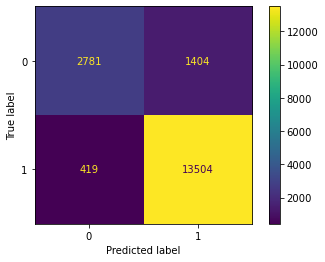

In [49]:
plot_confusion_matrix(lr_pipe, X_train, y_train)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


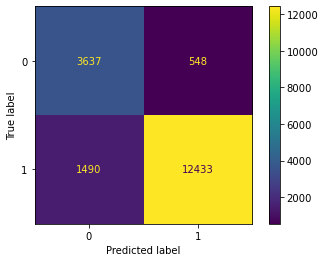

In [50]:
plot_confusion_matrix(lr2_pipe, X_train, y_train)

In [51]:
#comparing confusion matrix w/ smote (lr2) versus confusion matrix w/o smote (lr)

In [52]:
# Show Classification Report
print(classification_report(y_train, lr2_yhat))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4185
           1       0.96      0.89      0.92     13923

    accuracy                           0.89     18108
   macro avg       0.83      0.88      0.85     18108
weighted avg       0.90      0.89      0.89     18108



In [53]:
cross_val(lr2_pipe, X_train, y_train, accuracy)

Mean accuracy score:  {0.8565823084586492} .
Median acuracy score:  {0.8578133627829928} .
Standard Deviation in accuracy:  {0.0034112273820527256} .


- Mean accuracy score:  {0.8565823084586492} .
- Median acuracy score:  {0.8578133627829928} .
- Standard Deviation in accuracy:  {0.0034112273820527256} .

In [54]:
#adjusting max_features params

In [55]:
lr3_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (1500, 2000, 3000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [56]:
grid_lr3 = GridSearchCV(lr_pipe, param_grid=lr3_params, cv=5, verbose=3)

In [57]:
grid_lr3.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1500;, score=0.867 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1500;, score=0.871 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1500;, score=0.874 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1500;, score=0.869 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1500;, score=0.868 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.869 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfg

[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=3000;, score=0.874 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=3000;, score=0.874 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=3000;, score=0.870 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.867 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.871 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.874 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.870 total t

[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=0.873 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=0.867 total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.870 total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.867 total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.874 total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.874 total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__m

[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=1500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=1500;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0

[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=3000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=3000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear

[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.856 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.854 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=0.848 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=3000;, score=0.855 total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=3000;, score=0.854 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=3000;, score=0.857 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_feat

[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.855 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.849 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=1500;, score=0.847 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=2000;, score=0.853 total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=2000;, score=0.854 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=2000;, score=0.856 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_feat

[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.857 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.856 total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=3000;, score=0.849 total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1500;, score=0.848 total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1500;, score=0.854 total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1500;, score=0.855 total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, v

[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=3000;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__so

[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=3000;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=1500;, score=nan total time=   0.2s
[CV 1/5] END lr__class_weight=balanced, lr__penalty

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-package

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__max_features': (1500, 2000, 3000)},
             verbose=3)

In [58]:
best_parameters = grid_lr3.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_lr3.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)
training_recall = recall_score(y_train, training_preds, average = None)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'saga'
vect__max_df: 0.5
vect__max_features: 3000
Training Accuracy: 89.62%
[0.66332139 0.96624291]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.5
- vect__max_features: 3000
- Training Accuracy: 89.62%
- [0.66332139 0.96624291]

In [59]:
#vect max features of 3000 seems to be optimal

## Grid Searching XGBoost

## Grid Searching RandomForestClassfier